In [2]:
import os
from PIL import Image


base_dir = "c:/Users/amine/Downloads/reduced_technical_test/dataset_word_color/TimesNRMTPro-Bold/"
paths = [os.path.join(base_dir, f) for f in os.listdir(base_dir)]
img_path = paths[0]
from PIL import Image

# Open the image
img = Image.open(img_path)

In [3]:
img.size

(128, 128)

In [37]:
import os
import pandas as pd
from PIL import Image
from tqdm import tqdm

dataset_path = "c:/Users/amine/Downloads/reduced_technical_test/dataset_word_color"

ids, paths, classes, widths, heights = [], [], [], [], []
counter = 0

# Collect all image paths first
all_files = []
for font_class in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, font_class)
    if os.path.isdir(class_path):
        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)
            if os.path.isfile(file_path):
                all_files.append((file_path, font_class))

# Single tqdm loop over all images
for file_path, font_class in tqdm(all_files, desc="Processing images"):
    with Image.open(file_path) as img:
        w, h = img.size
    ids.append(counter)
    paths.append(file_path)
    classes.append(font_class)
    widths.append(w)
    heights.append(h)
    counter += 1

df = pd.DataFrame({
    "id": ids,
    "path": paths,
    "class": classes,
    "width": widths,
    "height": heights
})

print(df.head())


Processing images:  39%|███▉      | 40706/104724 [03:09<04:58, 214.53it/s]  


KeyboardInterrupt: 

In [10]:
import cv2
import numpy as np

def crop_text_block(image_path, output_path, padding=10):
    """
    Detects the main text block in the image and crops it.
    
    Parameters:
    - image_path: path to input image
    - output_path: path to save cropped text block
    - padding: extra pixels around detected text block
    """
    # Load image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply binary threshold (invert colors to get text as white)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Dilate to merge text lines into one block
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    dilated = cv2.dilate(thresh, kernel, iterations=1)

    # Find contours
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour (assumed to be the main text block)
    if not contours:
        print("No text block found!")
        return None

    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Apply padding
    x = max(x - padding, 0)
    y = max(y - padding, 0)
    w = min(w + 2*padding, img.shape[1]-x)
    h = min(h + 2*padding, img.shape[0]-y)

    # Crop and save
    crop = img[y:y+h, x:x+w]
    cv2.imwrite(output_path, crop)
    print(f"Cropped text block saved to {output_path}")
    return crop

In [ ]:
from torchvision.models import vit_b_16, ViT_B_16_Weights
model = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)

c:\Users\amine\miniconda3\envs\publicis\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [19]:

output_dir = "cropped_text"
out = crop_text_block(img_path, f"{output_dir}/cropped_block.png")

Cropped text block saved to cropped_text/cropped_block.png


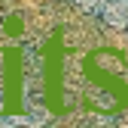